In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                           accuracy_score, precision_recall_fscore_support, precision_score,
                           recall_score, f1_score, roc_curve, precision_recall_curve,
                           average_precision_score)
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Libraries imported successfully!")


Libraries imported successfully!


In [72]:
import pandas as pd

#file_path = '/content/drive/My Drive/ML/mesa-sleep-dataset-0.7.0.csv'
file_path = 'C:\\Users\\Rashane\\GitHub\\Data\\mesa-sleep-dataset-0.7.0.csv'
mesa_df = pd.read_csv(file_path)

print(f"Dataset shape: {mesa_df.shape}")
print(f"Column names: {list(mesa_df.columns)}")
print(f"Total count: {mesa_df.shape[0]}")

# Check for missing values across key columns
print(f"\nMissing values summary:")
print(mesa_df.isnull().sum().sort_values(ascending=False).head(20))

Dataset shape: (2237, 623)
Column names: ['mesaid', 'examnumber', 'race1c', 'gender1', 'cucmcn1c', 'sleepage5c', 'site5c', 'htcm5', 'wtlb5', 'bmi5c', 'smkstat5', 'cursmk5', 'bedtmwkday5c', 'waketmwkday5c', 'wkdaysleepdur5c', 'wkdaysleepdur5t', 'bedtmwkend5c', 'waketmwkend5c', 'wkendsleepdur5c', 'wkendsleepdur5t', 'nap5', 'trbleslpng5', 'wakeup5', 'wakeearly5', 'bcksleep5', 'slpngpills5', 'irritable5', 'sleepy5', 'typicalslp5', 'readng5', 'tv5', 'sittng5', 'riding5', 'lyngdwn5', 'talkng5', 'quietly5', 'car5', 'dinner5', 'driving5', 'snored5', 'stpbrthng5', 'legsdscmfrt5', 'rubbnglgs5', 'wrserest5', 'wrseltr5', 'feelngbstr5', 'tired5', 'mosttired4', 'feelngbstpk5', 'types5', 'slpapnea5', 'cpap5', 'dntaldv5', 'uvula5', 'insmnia5', 'rstlesslgs5', 'wrksched5', 'extrahrs5', 'sleepqsid', 'whiirs5c', 'epslpscl5c', 'hoostmeq5c', 'havepsg5', 'haveact5', 'match5', 'stdypdy5c', 'status_psg5', 'rsnco5', 'scorerid5', 'inhomepsgyn5', 'e1dur5', 'e2dur5', 'chindur5', 'fzm1dur5', 'c4dur5', 'o2m1dur5', '

In [73]:
selected_features = [
    # Target variable
    'ahi_a0h3a',      # Apnea-Hypopnea Index - number of apnea/hypopnea events per hour (≥5 = sleep apnea diagnosis)

    # Primary oxygen saturation features (highest predictive importance)
    'avgsat5',        # Average oxygen saturation (SpO2) during sleep - normal >95%
    'minsat5',        # Minimum oxygen saturation reached during sleep - indicates worst desaturation severity
    'pctlt905',       # Percentage of sleep time with SpO2 < 90% - direct measure of significant hypoxemia
    'odi35',          # Oxygen Desaturation Index ≥3% - number of 3%+ oxygen drops per hour
    'odi45',          # Oxygen Desaturation Index ≥4% - number of 4%+ oxygen drops per hour (more severe events)

    # Sleep architecture parameters
    'slp_eff5',       # Sleep efficiency - percentage of time in bed actually spent asleep (normal >85%)
    'waso5',          # Wake After Sleep Onset - total minutes awake after initially falling asleep
    'timeremp5',      # REM sleep percentage - proportion of total sleep time in REM stage (normal 20-25%)
    'times34p5',      # Deep sleep percentage - Stage 3&4 NREM sleep (most restorative, normal 15-25%)
    'ai_all5',        # Arousal Index - total number of brief awakenings per hour (sleep fragmentation measure)

    # Demographics/Anthropometrics (established clinical risk factors)
    'bmi5c',          # Body Mass Index - weight(kg)/height(m)² (obesity major OSA risk factor)
    'sleepage5c',     # Age at sleep study - OSA prevalence increases with age
    'gender1',        # Gender (typically 1=male, 0=female) - males 2-8x higher OSA risk

    # Heart rate variability features (autonomic nervous system indicators)
    'sdnn_fn5',       # Standard Deviation of NN intervals - overall HRV measure
    'rmssd_fn5',      # Root Mean Square of Successive Differences - short-term HRV, parasympathetic activity
    'avnn_fn5',       # Average NN interval - mean time between normal heartbeats (ms)

    # Additional respiratory/physiological measures
    'avgplm5',        # Average Periodic Limb Movements per hour - often co-occurs with sleep disorders
    'bpmavg5',        # Average heart rate (beats per minute) during sleep

    # Sleep timing parameters
    'slp_lat5',       # Sleep latency - time from lights off to sleep onset (minutes)
    'time_bed5',      # Total time in bed - duration from bedtime to final wake time (minutes)
    'smkstat5',       # Current smoker status (1=yes, 0=no) - smoking increases OSA risk
    'cursmk5'       # Ever smoker status (1=yes, 0=no) - smoking increases OSA risk
]



In [74]:
df = mesa_df[selected_features]
df.head()

,ahi_a0h3a,avgsat5,minsat5,pctlt905,odi35,odi45,slp_eff5,waso5,timeremp5,times34p5,...,gender1,sdnn_fn5,rmssd_fn5,avnn_fn5,avgplm5,bpmavg5,slp_lat5,time_bed5,smkstat5,cursmk5
0,27.558140,95.0665,90.0,0.00,17.117733,7.668605,59.826087,205.5,11.4,2.77,...,0,52.1685,24.5672,920.932,4.709302,63.0,26.0,575.0,1.0,0.0
1,10.748663,93.0465,81.0,1.90,9.201337,4.068449,86.374134,59.0,24.2,20.90,...,0,56.2262,21.2343,921.358,8.502674,65.0,NaN,433.0,0.0,NaN
2,67.206704,93.2420,64.0,9.46,65.113966,51.043017,72.032193,139.0,16.6,10.50,...,0,72.4391,44.8628,878.754,34.189944,68.0,NaN,497.0,1.0,0.0
3,48.000000,92.9349,78.0,5.33,42.700000,32.300000,55.276382,89.0,0.0,33.30,...,1,NaN,NaN,NaN,14.727273,93.0,NaN,199.0,0.0,NaN
4,33.626374,93.1622,88.0,0.13,26.011355,17.435531,46.826758,298.0,12.5,2.94,...,1,91.0493,21.1066,1096.870,0.000000,52.0,12.0,583.0,0.0,NaN


In [75]:
df['has_sleep_apnea'] = (df['ahi_a0h3a'] >= 15).astype(int)

df_clean = df.dropna(subset=['ahi_a0h3a']).copy()
print(f"After removing missing AHI: {df_clean.shape}")


print(f"\nClass Distribution:")
print(df_clean['has_sleep_apnea'].value_counts())
print(f"Sleep apnea percentage: {df_clean['has_sleep_apnea'].mean():.1%}")

After removing missing AHI: (2057, 24)

Class Distribution:
has_sleep_apnea
1    1220
0     837
Name: count, dtype: int64
Sleep apnea percentage: 59.3%


In [76]:
#Define final feature set 
features_to_exclude = ['slp_lat5']  # >50% missing
feature_columns = [col for col in df_clean.columns if col not in ['ahi_a0h3a', 'has_sleep_apnea'] + features_to_exclude]

print(f"\nFinal feature set ({len(feature_columns)} features):")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")


Final feature set (21 features):
 1. avgsat5
 2. minsat5
 3. pctlt905
 4. odi35
 5. odi45
 6. slp_eff5
 7. waso5
 8. timeremp5
 9. times34p5
10. ai_all5
11. bmi5c
12. sleepage5c
13. gender1
14. sdnn_fn5
15. rmssd_fn5
16. avnn_fn5
17. avgplm5
18. bpmavg5
19. time_bed5
20. smkstat5
21. cursmk5


In [77]:
#Remove extreme outliers using IQR method
def remove_outliers(df, columns, factor=3.0):
    """Remove extreme outliers using IQR method"""
    df_clean = df.copy()
    outliers_removed = {}

    for col in columns:
        if df_clean[col].dtype in ['float64', 'int64']:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR

            outliers = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            outliers_count = outliers.sum()

            if outliers_count > 0:
                df_clean.loc[outliers, col] = np.nan
                outliers_removed[col] = outliers_count

    return df_clean, outliers_removed

# Remove outliers
df_processed, outliers_info = remove_outliers(df_clean, feature_columns)

print("Outliers converted to NaN:")
for col, count in outliers_info.items():
    print(f"{col:15}: {count:3d} outliers")


Outliers converted to NaN:
avgsat5        :   8 outliers
minsat5        :  12 outliers
pctlt905       : 166 outliers
odi35          :   4 outliers
odi45          :  33 outliers
slp_eff5       :   5 outliers
waso5          :   7 outliers
timeremp5      :   2 outliers
ai_all5        :  10 outliers
bmi5c          :   2 outliers
sdnn_fn5       :  23 outliers
rmssd_fn5      :  68 outliers
avnn_fn5       :   1 outliers
avgplm5        :  80 outliers
cursmk5        : 138 outliers


In [78]:
# Features and target
X = df_processed[feature_columns]
y = df_processed['has_sleep_apnea']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")

# Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("Missing values handled with median imputation")


Training set shape: (1645, 21)
Test set shape: (412, 21)
Training class distribution: {1: 976, 0: 669}
Missing values handled with median imputation


In [79]:
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_imputed),
    columns=X_train_imputed.columns,
    index=X_train_imputed.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_imputed),
    columns=X_test_imputed.columns,
    index=X_test_imputed.index
)

print("Features scaled for Logistic Regression")


Features scaled for Logistic Regression


In [80]:
# Initialize XGBoost model
model = XGBClassifier(
    n_estimators=100,        # number of trees
    max_depth=10,            # tree depth
    learning_rate=0.1,       # shrinkage step size
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)  # balance classes
)

# Train and evaluate XGBoost model
print(f"\n{'='*50}")
print("Training XGBoost")
print('='*50)

# Train model
model.fit(X_train_imputed, y_train)

# Predictions
y_pred = model.predict(X_test_imputed)
y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Cross-validation
cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='roc_auc')

# Store results
results = {
    'XGBoost': {
        'accuracy': accuracy,
        'auc': auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
}

# Store trained model
trained_models = {'XGBoost': (model, X_train_imputed, X_test_imputed)}

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")
print(f"CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



Training XGBoost
Test Accuracy: 0.8859
Test AUC: 0.9601
CV AUC: 0.9676 (±0.0078)


In [81]:
# Analyze feature importance for Random Forest
def analyze_feature_importance(model, feature_names, model_name):
    """Analyze and display feature importance"""
    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 Most Important Features - {model_name}:")
        print("-" * 50)
        for _, row in importance_df.head(10).iterrows():
            print(f"{row['feature']:20}: {row['importance']:.4f}")

        return importance_df
    else:
        print(f"Feature importance not available for {model_name}")
        return None

# Display feature importance for XGBoost
model, _, _ = trained_models['XGBoost']
importance_df = analyze_feature_importance(model, feature_columns, 'XGBoost')



Top 10 Most Important Features - XGBoost:
--------------------------------------------------
odi35               : 0.3658
odi45               : 0.1154
ai_all5             : 0.0822
pctlt905            : 0.0691
gender1             : 0.0404
avgsat5             : 0.0269
minsat5             : 0.0266
sleepage5c          : 0.0250
avnn_fn5            : 0.0248
rmssd_fn5           : 0.0244


In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [50, 200],       # number of trees
    'max_depth': [10, 15, 20],       # depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # step size shrinkage
    'subsample': [0.8, 1.0],         # row sampling
    'colsample_bytree': [0.8, 1.0]   # feature sampling
}

print("Performing hyperparameter tuning for XGBoost...")

# Grid search
grid_search = GridSearchCV(
    XGBClassifier(
        random_state=42,
        scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # balance classes
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_imputed, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Final model with best parameters
final_model_XGB = grid_search.best_estimator_


Performing hyperparameter tuning for XGBoost...
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'subsample': 0.8}
Best CV AUC: 0.9685


EVALUATION OF FINAL XGBOOST MODEL

1. MODEL PERFORMANCE METRICS
----------------------------------------
Accuracy:  0.8859
Precision: 0.9020
Recall:    0.9057
F1-Score:  0.9039
AUC-ROC:   0.9586

2. CONFUSION MATRIX
----------------------------------------
True Negatives:   144
False Positives:   24
False Negatives:   23
True Positives:   221

3. DETAILED CLASSIFICATION REPORT
----------------------------------------
              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86       168
     Class 1       0.90      0.91      0.90       244

    accuracy                           0.89       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.89      0.89      0.89       412



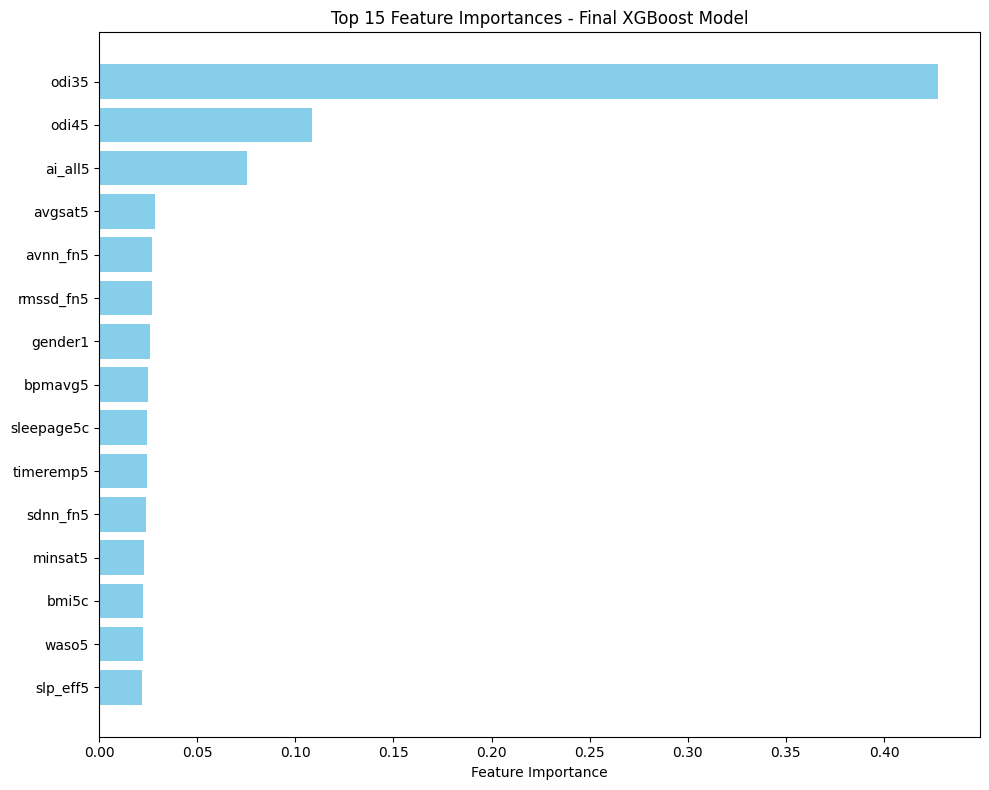

Features and their importance scores:
   feature  importance
     odi35    0.427516
     odi45    0.108737
   ai_all5    0.075661
   avgsat5    0.028364
  avnn_fn5    0.027074
 rmssd_fn5    0.026999
   gender1    0.025789
   bpmavg5    0.025126
sleepage5c    0.024537
 timeremp5    0.024520
  sdnn_fn5    0.023967
   minsat5    0.023045
     bmi5c    0.022531
     waso5    0.022352
  slp_eff5    0.022135
  pctlt905    0.021463
   avgplm5    0.021046
 times34p5    0.021015
 time_bed5    0.015500
  smkstat5    0.012623
   cursmk5    0.000000

8. FINAL MODEL PARAMETERS
----------------------------------------
Optimized hyperparameters:
colsample_bytree    : 1.0
learning_rate       : 0.1
max_depth           : 15
n_estimators        : 200
random_state        : 42
subsample           : 0.8

10. PERFORMANCE IMPROVEMENT
----------------------------------------
Comparison with initial XGBoost model:
Initial AUC:      0.9601
Final AUC:        0.9586
AUC Improvement:  -0.0016
Initial Accuracy: 0.88

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Evaluation of Final XGBoost Model
print("="*60)
print("EVALUATION OF FINAL XGBOOST MODEL")
print("="*60)

# Model Performance Metrics
print("\n1. MODEL PERFORMANCE METRICS")
print("-" * 40)

# Predictions on test set
y_pred_final = final_model_XGB.predict(X_test_imputed)
y_pred_proba_final = final_model_XGB.predict_proba(X_test_imputed)[:, 1]

# Basic metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, y_pred_proba_final)

print(f"Accuracy:  {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall:    {recall_final:.4f}")
print(f"F1-Score:  {f1_final:.4f}")
print(f"AUC-ROC:   {auc_final:.4f}")

# Confusion Matrix
print("\n2. CONFUSION MATRIX")
print("-" * 40)
cm = confusion_matrix(y_test, y_pred_final)
print(f"True Negatives:  {cm[0,0]:4d}")
print(f"False Positives: {cm[0,1]:4d}")
print(f"False Negatives: {cm[1,0]:4d}")
print(f"True Positives:  {cm[1,1]:4d}")

# Classification Report
print("\n3. DETAILED CLASSIFICATION REPORT")
print("-" * 40)
print(classification_report(y_test, y_pred_final, target_names=['Class 0', 'Class 1']))

# Feature importances
feature_importance_final = pd.DataFrame({
    'feature': X_train_imputed.columns,
    'importance': final_model_XGB.feature_importances_
}).sort_values(by='importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance_final.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Final XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Sort features by importance descending
feature_importances = feature_importance_final.sort_values(by='importance', ascending=False)

# Display all features with their importance
print("Features and their importance scores:")
print(feature_importances.to_string(index=False))

# Model Parameters
print("\n8. FINAL MODEL PARAMETERS")
print("-" * 40)
print("Optimized hyperparameters:")
for param, value in final_model_XGB.get_params().items():
    if param in ['n_estimators', 'max_depth', 'learning_rate', 'subsample', 'colsample_bytree', 'random_state']:
        print(f"{param:20}: {value}")

# Performance Comparison
print("\n10. PERFORMANCE IMPROVEMENT")
print("-" * 40)
print("Comparison with initial XGBoost model:")
initial_auc = results['XGBoost']['auc']
initial_accuracy = results['XGBoost']['accuracy']

print(f"Initial AUC:      {initial_auc:.4f}")
print(f"Final AUC:        {auc_final:.4f}")
print(f"AUC Improvement:  {auc_final - initial_auc:+.4f}")
print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Final Accuracy:   {accuracy_final:.4f}")
print(f"Accuracy Improvement: {accuracy_final - initial_accuracy:+.4f}")


In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize SVM model
model = SVC(
    C=1.0,                   # Regularization parameter
    kernel='rbf',             # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid'
    gamma='scale',            # Kernel coefficient
    probability=True,         # Required to get predict_proba for AUC
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train and evaluate SVM model
print(f"\n{'='*50}")
print("Training SVM")
print('='*50)

# Train model
model.fit(X_train_imputed, y_train)

# Predictions
y_pred = model.predict(X_test_imputed)
y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Cross-validation
cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='roc_auc')

# Store results
results = {
    'SVM': {
        'accuracy': accuracy,
        'auc': auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
}

# Store trained model
trained_models = {'SVM': (model, X_train_imputed, X_test_imputed)}

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")
print(f"CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



Training SVM
Test Accuracy: 0.7282
Test AUC: 0.9216
CV AUC: 0.9043 (±0.0164)
